# PCA

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sb

# PCA FOR VISUALIZATION
 - FROM 38-D TO 2-D

In [2]:
data = pd.read_csv("nutriton.csv")
df = data.drop(["ID","FoodGroup","ShortDescrip","Descrip","CommonName","MfgName","ScientificName"],axis =1)
label = data["FoodGroup"]

In [3]:
standardised_data = StandardScaler().fit_transform(df)
sample_data = standardised_data
covar_mat = np.matmul(sample_data.T,sample_data)

In [4]:
from scipy.linalg import eigh
covar_mat.shape

(38, 38)

In [5]:
values,vectors = eigh(covar_mat,eigvals=(36,37))
vectors = vectors.T

In [6]:
new_dat = np.matmul(vectors,sample_data.T)

In [7]:
new_dat = np.vstack((new_dat,label)).T

In [8]:
new_dat.shape

(8618, 3)

In [9]:
new_dat = pd.DataFrame(data=new_dat,columns = ("2nd Principal","1st Principal","Food Group"))

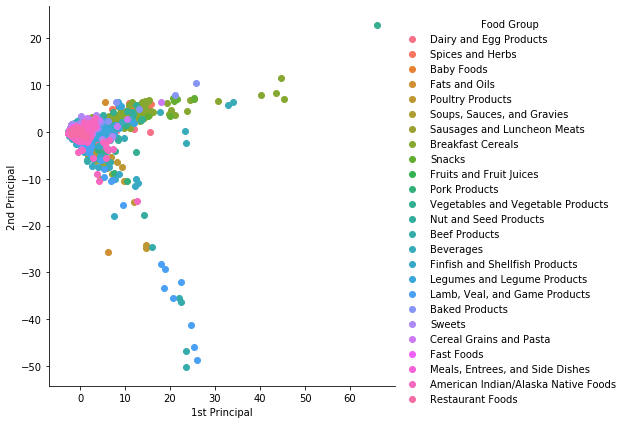

In [19]:
sb.FacetGrid(new_dat,hue="Food Group",height = 6).map(plt.scatter,"1st Principal","2nd Principal").add_legend()
plt.show()

In [11]:
from sklearn import decomposition


In [12]:
pca = decomposition.PCA()
pca.n_components = 2

In [13]:
pca_data = pca.fit_transform(sample_data)

In [14]:
pca_data = np.vstack((pca_data.T,label)).T
pca_data.shape

(8618, 3)

In [15]:
pca_data= pd.DataFrame(data=pca_data,columns = ("2nd Principal","1st Principal","Food Group"))

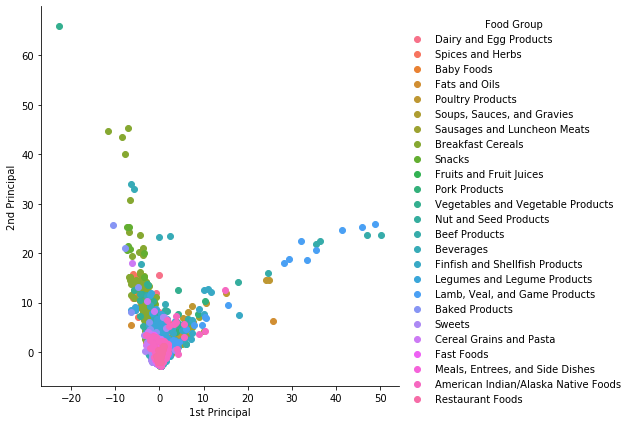

In [16]:
sb.FacetGrid(pca_data,hue="Food Group",height = 6).map(plt.scatter,"1st Principal","2nd Principal").add_legend()
plt.show()

# PCA FOR DIMENSIONALITY REDUCTION

In [17]:
pca.n_components = 38
pca_data = pca.fit_transform(sample_data)
percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

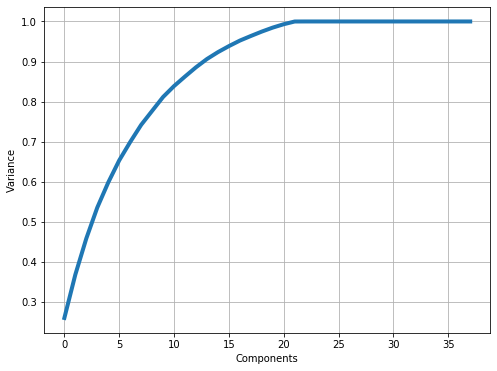

In [18]:
plt.figure(1,figsize=(8,6))
plt.plot(cum_var_explained,linewidth = 4)
plt.grid()
plt.xlabel("Components")
plt.ylabel("Variance")
plt.show()